In [1]:
import torch

import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(context="talk")

## Create a noisy signal

In [2]:
x = torch.linspace(0, 10, 100)
y = torch.sin(x) + torch.randn_like(x) * 0.5

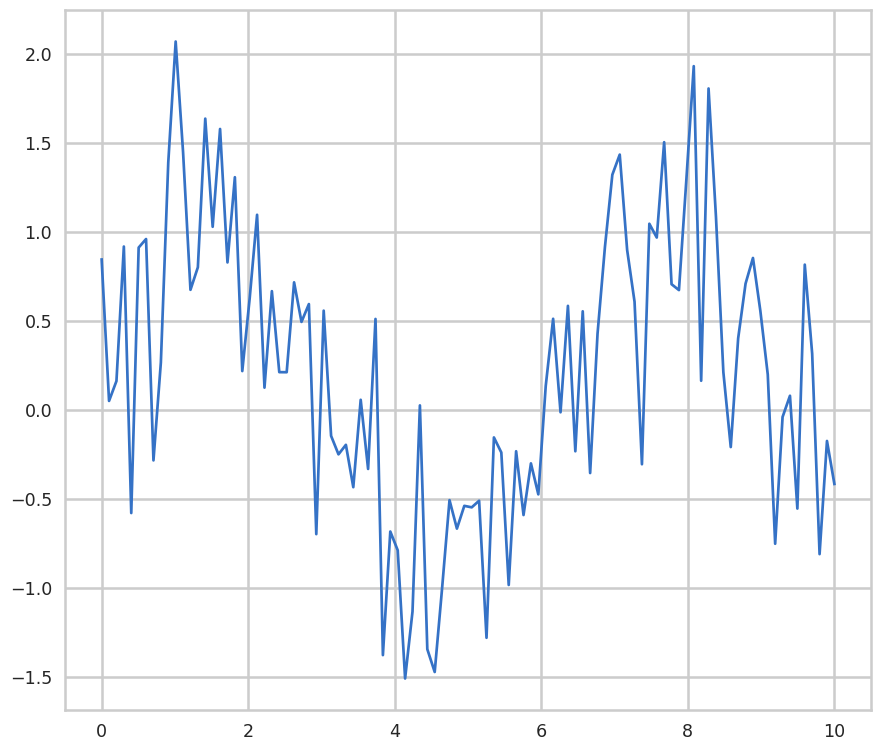

In [3]:
_ = plt.plot(x, y)

## Windowing Average

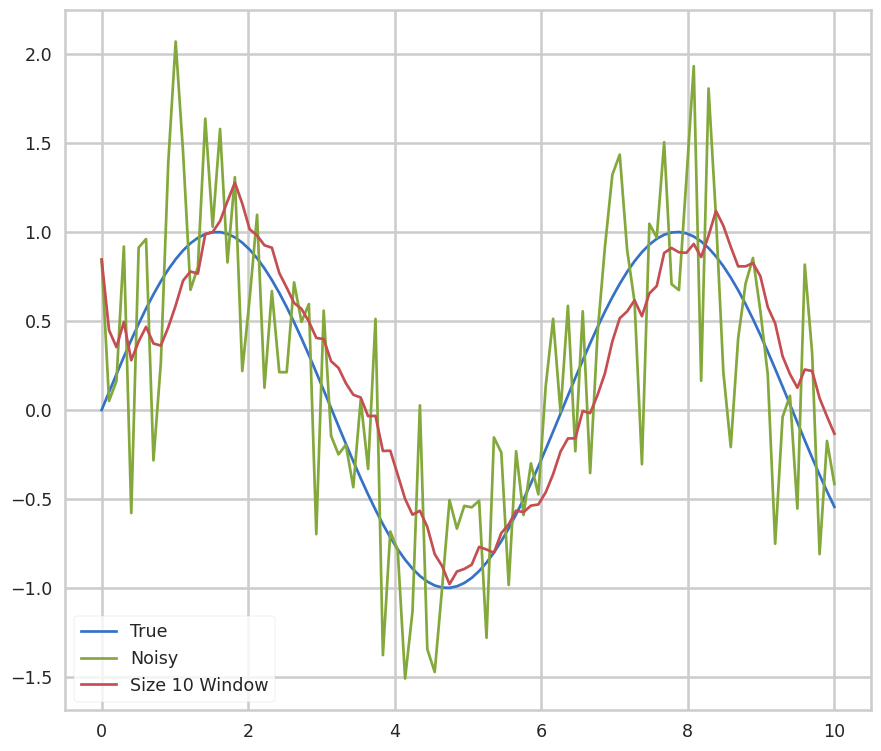

In [4]:
wsize = 10
vals = [0] * wsize

y_smooth = []

for i, yval in enumerate(y):
    vals[i % len(vals)] = yval
    # This can be optimized a bit
    y_avg = sum(vals[:i+1]) / len(vals[:i+1])
    y_smooth.append(y_avg)

plt.plot(x, torch.sin(x), label="True")
plt.plot(x, y, label="Noisy")
plt.plot(x, y_smooth, label=f"Size {wsize} Window")
_ = plt.legend()

## Exponential Moving Average (EMA)

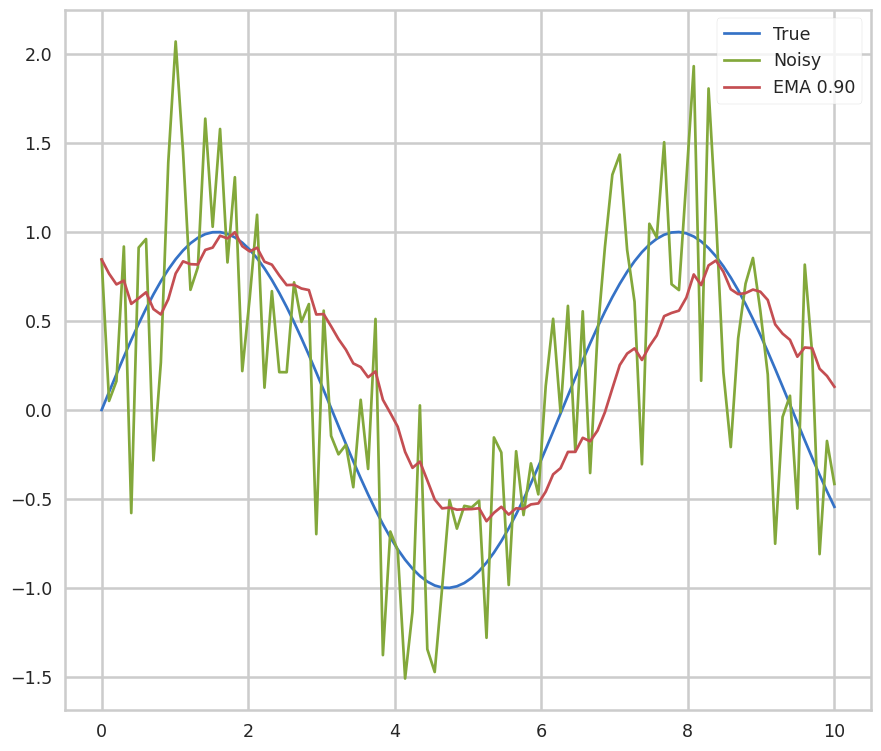

In [5]:
y_ema = [y[0]]
beta = 0.9

for yval in y[1:]:
    new_y_ema = beta * y_ema[-1] + (1 - beta) * yval
    y_ema.append(new_y_ema)

plt.plot(x, torch.sin(x), label="True")
plt.plot(x, y, label="Noisy")
plt.plot(x, y_ema, label=f"EMA {beta:.2f}")
_ = plt.legend()

## EMA With Bias Correction

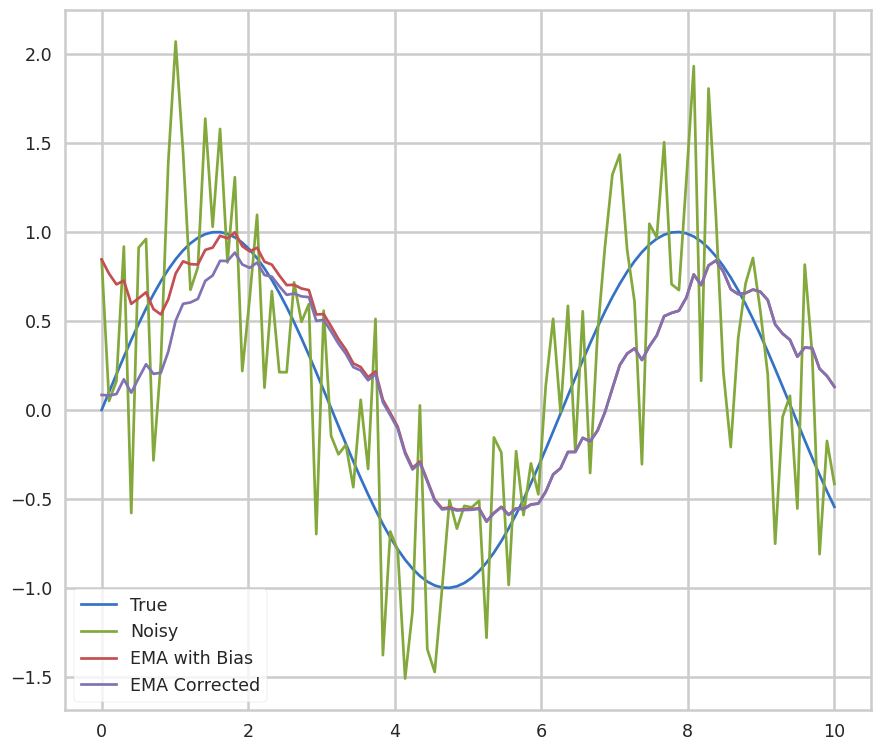

In [6]:
y_ema_corrected = [0]
beta = 0.9

for t, yval in enumerate(y):
    new_y_ema = beta * y_ema_corrected[-1] + (1 - beta) * yval
    new_y_ema_t = new_y_ema / (1 - beta ** (t + 1))
    y_ema_corrected.append(new_y_ema)

plt.plot(x, torch.sin(x), label='True')
plt.plot(x, y, label='Noisy')
plt.plot(x, y_ema, label='EMA with Bias')
plt.plot(x, y_ema_corrected[1:], label='EMA Corrected')
_ = plt.legend()